In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("./startup data.csv")

df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [ ]:


df.shape



(923, 49)

In [ ]:
df.drop(["Unnamed: 0","Unnamed: 6","id","state_code.1","latitude","longitude","zip_code","city","name",
       "closed_at","founded_at","first_funding_at","last_funding_at","object_id"], axis=1, inplace=True)

df.head(3)

,state_code,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,...,1,0,1,0,0,0,0,1.00,0,acquired
1,CA,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,...,0,1,0,0,1,1,1,4.75,1,acquired
2,CA,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,...,0,0,0,1,0,0,0,4.00,1,acquired


In [ ]:
df=pd.get_dummies(df, columns=["status"], drop_first=True)
df.head(2)

,state_code,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_closed
0,CA,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,...,1,0,1,0,0,0,0,1.00,0,0
1,CA,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,...,0,1,0,0,1,1,1,4.75,1,0


In [ ]:
df.isnull().sum().sort_values(ascending=False).head(7)

age_first_milestone_year    152
age_last_milestone_year     152
state_code                    0
has_angel                     0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
dtype: int64

In [ ]:
df.age_first_milestone_year.fillna(df["age_first_milestone_year"].median(), inplace=True)
df.age_last_milestone_year.fillna(df["age_last_milestone_year"].median(), inplace=True)

PCA

In [ ]:
X=df.drop(["state_code","category_code","status_closed"], axis=1)
Y=df.status_closed

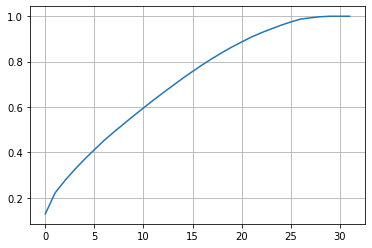

In [ ]:
X=StandardScaler().fit_transform(X)

pca=PCA(n_components=32)

X_pca=pca.fit_transform(X)
exp_var=pca.explained_variance_ratio_
cumsum_var=np.cumsum(exp_var)
cumsum_var
plt.plot(cumsum_var)
plt.grid()

,0,1
0,-0.880221,0.083562
1,4.427413,0.985919
2,-1.447586,-1.373237


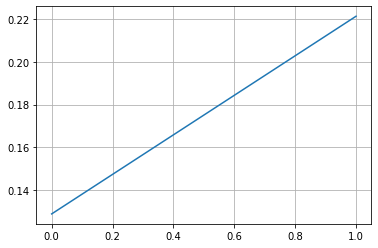

In [ ]:
pca_new=PCA(n_components=2)
X_new=pca_new.fit_transform(X)

exp_var_new=pca_new.explained_variance_ratio_
cumsum_var_new=np.cumsum(exp_var_new)

plt.plot(cumsum_var_new)
plt.grid()
X_new=pd.DataFrame(X_new)
X_new.head(3)

KNN with PCA

In [ ]:
# With X_new variable, continue to apply machine learning algorithm
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

knn=KNeighborsClassifier(n_neighbors=5
                        )

knn.fit(X_train,Y_train)
y_test_pred_knn=knn.predict(X_test)
y_train_pred_knn=knn.predict(X_train)

print("Accuracy of test set with the knn :", accuracy_score(Y_test,y_test_pred_knn))
print("Accuracy of train set with knn :", accuracy_score(Y_train,y_train_pred_knn),"\n")
print("Confusion matrix:","\n", confusion_matrix(Y_test,y_test_pred_knn),"\n")
print("Classification report: ","\n",classification_report(Y_test,y_test_pred_knn))

Accuracy of test set with the knn : 0.8050541516245487
Accuracy of train set with knn : 0.8281733746130031 

Confusion matrix: 
 [[158  19]
 [ 35  65]] 

Classification report:  
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       177
           1       0.77      0.65      0.71       100

    accuracy                           0.81       277
   macro avg       0.80      0.77      0.78       277
weighted avg       0.80      0.81      0.80       277



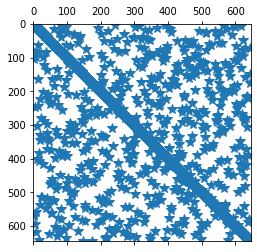

In [ ]:
from sklearn.neighbors import NearestNeighbors

A=knn.kneighbors_graph(X_train,n_neighbors=2)
plt.spy(A, marker="*")
plt.show()

Logestic Regression

In [ ]:
log_reg=LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
log_reg.fit(X_train,Y_train)

y_test_pred=log_reg.predict(X_test)
y_train_pred=log_reg.predict(X_train)

print("Accuracy of the test set:", accuracy_score(Y_test,y_test_pred))
print("Accuracy of the train set:", accuracy_score(Y_train,y_train_pred))

print(classification_report(Y_test,y_test_pred))
print(confusion_matrix(Y_test,y_test_pred))

Accuracy of the test set: 0.8844765342960289
Accuracy of the train set: 0.8653250773993808
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       177
           1       0.81      0.88      0.85       100

    accuracy                           0.88       277
   macro avg       0.87      0.88      0.88       277
weighted avg       0.89      0.88      0.89       277

[[157  20]
 [ 12  88]]
